**Import all the libraries needed**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Read Data**

In [2]:
df = pd.read_csv('Datasets.csv', lineterminator='\n')

In [3]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [4]:
df.size

88443

In [5]:
df.shape

(9827, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [7]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [8]:
df.duplicated().sum()

0

In [9]:
df.Genre.head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

**Data Preprocesing**

In [10]:
#Change the data type of date from object to datetime
df.Release_Date = pd.to_datetime(df['Release_Date'])
print(df.Release_Date.dtypes)

datetime64[ns]


In [11]:
df.Release_Date = df.Release_Date.dt.year
print(df.Release_Date.dtypes)

int32


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   int32  
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int32(1), int64(1), object(5)
memory usage: 652.7+ KB


In [13]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [14]:
col_to_drop = ['Overview', 'Original_Language', 'Poster_Url']
df.drop(col_to_drop, inplace=True, axis=1)

In [15]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


In [16]:
# Change the vote average to label (Most Popular, Average Popular, Below Average, Not Popular)
def convert(df, col, labels):
    edge = [df[col].describe()['min'],
           df[col].describe()['25%'],
           df[col].describe()['50%'],
           df[col].describe()['75%'],
           df[col].describe()['max'],
           ]
    df[col]= pd.cut(df[col],labels=labels, duplicates='drop', bins = edge)
    return df
labels = ['Not Popular','Below Average','Average Popular','Most Popular' ]
convert(df,'Vote_Average',labels)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Most Popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,Most Popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,Below Average,Thriller
3,2021,Encanto,2402.201,5076,Most Popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,Average Popular,"Action, Adventure, Thriller, War"
...,...,...,...,...,...,...
9822,1973,Badlands,13.357,896,Most Popular,"Drama, Crime"
9823,2020,Violent Delights,13.356,8,Not Popular,Horror
9824,2016,The Offering,13.355,94,Not Popular,"Mystery, Thriller, Horror"
9825,2021,The United States vs. Billie Holiday,13.354,152,Average Popular,"Music, Drama, History"


In [17]:
df.dropna(inplace = True)
df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [18]:
# Seperate all the generes in seperate rows
df.Genre=df.Genre.str.split(", ")
df = df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Most Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Most Popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Most Popular,Science Fiction
3,2022,The Batman,3827.658,1151,Most Popular,Crime
4,2022,The Batman,3827.658,1151,Most Popular,Mystery


In [19]:
df.Genre = df.Genre.astype('category')
df.Genre.dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25552 non-null  int32   
 1   Title         25552 non-null  object  
 2   Popularity    25552 non-null  float64 
 3   Vote_Count    25552 non-null  int64   
 4   Vote_Average  25552 non-null  category
 5   Genre         25552 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 749.6+ KB


In [21]:
df.nunique()

Release_Date     100
Title           9415
Popularity      8088
Vote_Count      3265
Vote_Average       4
Genre             19
dtype: int64

**Data Visualization**

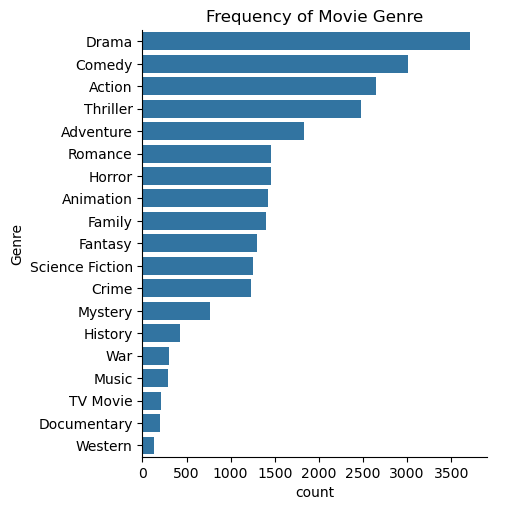

In [22]:
#What is the most frequent genre of movies released on Netflix?
sns.catplot(y = 'Genre', data=df, kind = 'count', order = df.Genre.value_counts().index )
plt.title("Frequency of Movie Genre")
plt.show()

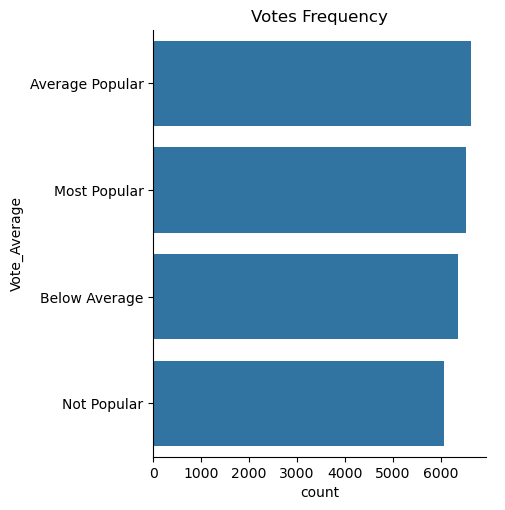

In [24]:
#Which has highest votes in vote avg column?
sns.catplot(y = 'Vote_Average', data = df, kind = 'count', order = df.Vote_Average.value_counts().index)
plt.title("Votes Frequency")
plt.show()

In [30]:
# What movie got the highest popularity? what's its genre?
df[df.Popularity == df.Popularity.max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,5083.954,3827.658,2618.087,2402.201,...,13.367,13.365,13.364,13.36,13.359,13.358,13.357,13.356,13.355,13.354
0,2021,Spider-Man: No Way Home,5083.954,8940,Most Popular,Action,5083.954,5083.954,5083.954,5083.954,...,5083.954,5083.954,5083.954,5083.954,5083.954,5083.954,5083.954,5083.954,5083.954,5083.954
1,2021,Spider-Man: No Way Home,5083.954,8940,Most Popular,Adventure,5083.954,5083.954,5083.954,5083.954,...,5083.954,5083.954,5083.954,5083.954,5083.954,5083.954,5083.954,5083.954,5083.954,5083.954
2,2021,Spider-Man: No Way Home,5083.954,8940,Most Popular,Science Fiction,5083.954,5083.954,5083.954,5083.954,...,5083.954,5083.954,5083.954,5083.954,5083.954,5083.954,5083.954,5083.954,5083.954,5083.954


In [31]:
#What movie got the lowest popularity? what's its genre?
df[df.Popularity == df.Popularity.min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,5083.954,3827.658,2618.087,2402.201,...,13.367,13.365,13.364,13.36,13.359,13.358,13.357,13.356,13.355,13.354
25546,2021,The United States vs. Billie Holiday,13.354,152,Average Popular,Music,5083.954,5083.954,5083.954,5083.954,...,5083.954,5083.954,5083.954,5083.954,5083.954,5083.954,5083.954,5083.954,5083.954,5083.954
25547,2021,The United States vs. Billie Holiday,13.354,152,Average Popular,Drama,5083.954,5083.954,5083.954,5083.954,...,5083.954,5083.954,5083.954,5083.954,5083.954,5083.954,5083.954,5083.954,5083.954,5083.954
25548,2021,The United States vs. Billie Holiday,13.354,152,Average Popular,History,5083.954,5083.954,5083.954,5083.954,...,5083.954,5083.954,5083.954,5083.954,5083.954,5083.954,5083.954,5083.954,5083.954,5083.954
25549,1984,Threads,13.354,186,Most Popular,War,5083.954,5083.954,5083.954,5083.954,...,5083.954,5083.954,5083.954,5083.954,5083.954,5083.954,5083.954,5083.954,5083.954,5083.954
25550,1984,Threads,13.354,186,Most Popular,Drama,5083.954,5083.954,5083.954,5083.954,...,5083.954,5083.954,5083.954,5083.954,5083.954,5083.954,5083.954,5083.954,5083.954,5083.954
25551,1984,Threads,13.354,186,Most Popular,Science Fiction,5083.954,5083.954,5083.954,5083.954,...,5083.954,5083.954,5083.954,5083.954,5083.954,5083.954,5083.954,5083.954,5083.954,5083.954


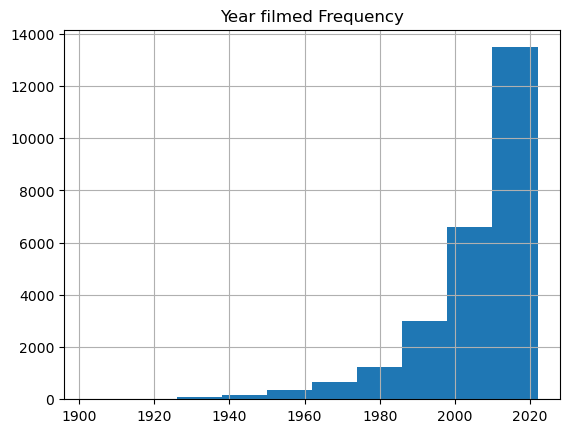

In [33]:
#Which year has the most filmmed movies?
df['Release_Date'].hist()
plt.title("Year filmed Frequency")
plt.show()